<a href="https://colab.research.google.com/github/StevenMElliott/DS-Unit-2-Linear-Models/blob/master/Doing_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#install libraries etc

In [0]:
!pip install category_encoders
!pip install -U pandas-profiling
LOCAL = '../data/nyc/nyc-rent-2016.csv'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/nyc/nyc-rent-2016.csv'

In [0]:
import pandas as pd
import pandas_profiling
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

df = pd.read_csv(WEB)

#Feature Engineering

In [0]:
#baseline
df['price_mean'] = df['price'].mean()

#convert created to datetime
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)
df['month'] = df['created'].dt.month

#How many characters are in the description
df['description_length'] = df['description'].str.len()

#Is there is a description?
df['description'] = df['description'].str.strip().fillna('')
df['has_description'] = df['description'] != ''

#pet friendly
df['pet_friendly'] = (df['cats_allowed'] == 1) | (df['dogs_allowed'] == 1)

#has laundry
df['has_laundry'] = df[['laundry_in_unit', 'laundry_in_building']].sum(axis=1)

#community perks
com_perks = ['elevator', 'doorman', 'fitness_center', 'roof_deck', 
             'swimming_pool', 'common_outdoor_space']
df['com_perks_count'] = df[com_perks].sum(axis=1)

#unit perks
unit_perks = ['pet_friendly', 'hardwood_floors', 'dishwasher', 'laundry_in_unit',
             'pre-war', 'dining_room', 'high_speed_internet', 'balcony',
             'garden_patio']
df['unit_perks_count'] = df[unit_perks].sum(axis=1)

#total perks
total_perks = ['elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
             'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
             'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
             'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
             'swimming_pool', 'new_construction', 'exclusive', 'terrace', 
             'loft', 'garden_patio', 'common_outdoor_space', 
             'wheelchair_access']
df['total_perks'] = df[total_perks].sum(axis=1)

In [30]:
train = df.query('month < 6')
test = df.query('month == 6')
df.shape, train.shape, test.shape

((48300, 43), (31515, 43), (16785, 43))

#Modeling

In [0]:
def error():
  #train mae
  y_true = train[target]
  y_pred = model.predict(train[features])
  train_error = mean_absolute_error(y_true, y_pred)
  
  #test mae
  y_true = test[target]
  y_pred = model.predict(test[features])
  test_error = mean_absolute_error(y_true, y_pred)
  
  #print the MAE
  print('Train MAE $', round(train_error, 2))
  print('Test MAE $', round(test_error, 2))

In [0]:
def plot_preds(x, y, y_pred):
    plt.scatter(x, y, label='y_true')
    plt.plot(x, y_pred, label='y_pred')
    plt.legend()
    
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

AttributeError: ignored

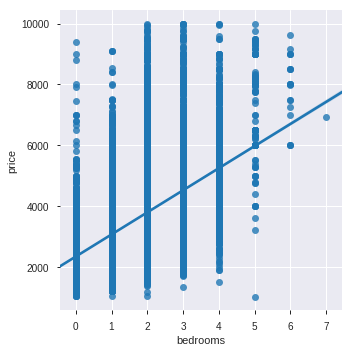

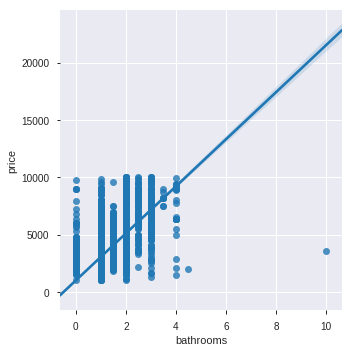

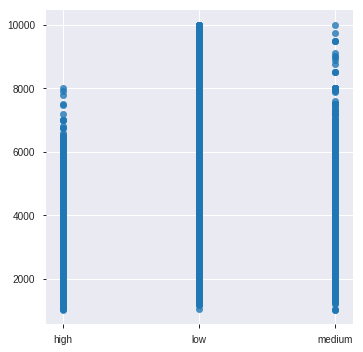

In [36]:
%matplotlib inline

features = ['bedrooms', 'bathrooms', 'interest_level']
target = 'price'

for feature in features:
  sns.lmplot(x=feature, y=target, data=train)

In [44]:
#baseline
features = ['price_mean']
target = 'price'
#train model fit
model = LinearRegression()
model.fit(train[features], train[target])
print(model.intercept_, model.coef_)
error()

3432.7534190068222 [0.]
Train MAE $ 1056.0
Test MAE $ 1052.68


In [45]:
#LR
features = ['bedrooms', 'bathrooms', 'latitude', 'longitude', 
            'cats_allowed', 'doorman', 'hardwood_floors', 'laundry_in_unit', 
            'elevator', 'high_speed_internet', 'dishwasher', 'dining_room']
target = 'price'
#train model fit
model = LinearRegression()
model.fit(train[features], train[target])
print(model.intercept_, model.coef_)
error()

-1012327.739883718 [   492.93515055   1265.08621007   1015.51545145 -13138.31518656
     58.17974631    439.63165515   -208.64025572    353.62346057
    160.57960755   -369.66585595     94.53475498     57.28897102]
Train MAE $ 606.08
Test MAE $ 622.86


#Decision Tree Fun

In [25]:
#Someitmes less is more. The more features I add to the DT the less accurate it
#becomes.
features = ['bedrooms', 'bathrooms', 'latitude', 'longitude', 'doorman']
target = 'price'

model = DecisionTreeRegressor(criterion='mae', min_samples_leaf=1)
model.fit(train[features], train[target])

error()

Train MAE $ 109.33
Test MAE $ 374.2
